### Fundamentos de Data Science
* Analizando la Rotación de Clientes en Telecomunicaciones

In [1]:
# carga de datos y bibliotecas
from google.colab import drive

# se conecta colba con drive
drive.mount('/content/drive')
# Se importa biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [2]:
# Se carga la BDD
path = '/content/drive/MyDrive/DATA/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####  Se usa df.info() para ver nombres de columnas y tipos de datos
* Se verfica que existen 21 columnas con 7043 entradas

In [4]:
# Se limpian las columnas y se dejan nombres en minuscula y sin espacios
df.columns = df.columns.str.lower().str.strip()

In [5]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### En primer lugar se verifca los tipos de datos que esten correctos segun su valor

In [8]:
df.describe()



,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Se verifica que no sale la columna 'totalcharges', siendo los valores float, por lo tanto se debe corregir el tipo de dato
* Tambien se puede ver que la columna 'seniorcitizen' tiene como minimo valor 0.
* Ademas se verifica que la columna 'tenure', tambien tiene como minimo valor 0.
* se supone que el valor maximo: 72 de columna tenure corresponde a medida en meses.

In [9]:
print(df.dtypes)


customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object


* Se verifica que el tipo de dato de la columna totalcharges que contiene valores de tipo float esta declarada como object.


In [10]:
# Se revisa columna 'tenure' por dato encontrado en df.decribed() con minimo igual a 0
df[df["tenure"]== 0]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### Se revisa los registros con valor cero en la columna 'tenure' y se observa que la columna 'totalcharges' contiene espacio en los valores, con esto se puede suponer que las columnas estan relacionadas. si el valor de 'tenure' es cero entonces el valor de la columna totalcharges es cero, pero como esta declarada como object en este caso string, contiene espacios.
Para esto se le asignara a la columna 'totalcharges' el valor de '0.0' y luego se cambiara el tipo de dato a float.
Se puede suponer que los valores en cero en la columna 'tenure', corresponde a clientes nuevos, por lo tanto no tienen un cargo total, solo mensual.

In [11]:
# se modifica los valores de la columna con el metodo apply() y funcion lambda
df['totalcharges'] = df['tenure'].apply(lambda x: '0.0' if x == 0 else x)


#### Se verifica si hay valores nulos

In [12]:
print(df['totalcharges'].isnull().sum())

0


In [13]:
df["totalcharges"].value_counts()

,count
totalcharges,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [14]:
# Luego se cambia el tipo de dato object de la columna totalcharges a float con la funcion astype()
df["totalcharges"] = df["totalcharges"].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


* Se verifica si hay duplicados

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
print(df.shape)

(7043, 21)


####  No se registran duplicados

* Se verifica si hay inconsistencia en los valore categoricos

In [18]:
# Se revisa la columna 'customerid'
df["customerid"].unique()


array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [19]:
df["partner"].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df["phoneservice"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df["multiplelines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [22]:
df["internetservice"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [23]:
df["onlinesecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df["deviceprotection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
df["techsupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df["streamingtv"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df["streamingmovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
df["contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
df["streamingmovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
df["paperlessbilling"].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df["paymentmethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [32]:
df["churn"].unique()


array(['No', 'Yes'], dtype=object)

* Se verifica que no hay inconsistencias en categorias al revisar las columnas con el metodo unique().

#### Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [33]:
# Se revisa columna 'seniorcitizen'
df["seniorcitizen"].value_counts()

,count
seniorcitizen,
0,5901
1,1142


* se verifica que la columna 'seniorcitizen', contiene solo numero 0 y 1. se supone que se refiere a 0:no es tercera edad y 1:es tercera edad.

* Exploración de datos con Python:

#### Crear dos tipos diferentes de visualizaciones exploratorias univariadas.

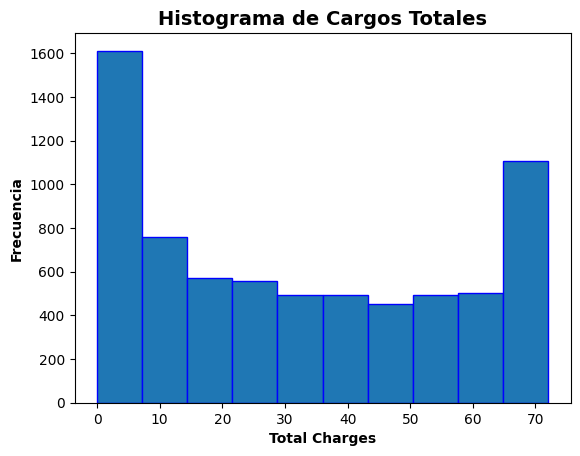

In [34]:
# grafico histograma que muestra la distribución de frecuencia de columna 'totalcharges'

plt.hist(df["totalcharges"], bins=10, edgecolor='blue')
plt.title('Histograma de Cargos Totales', fontsize=14, fontweight='bold')
plt.xlabel('Total Charges', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')
plt.show()


* Se interpreta del Gráfico que hay concentración en los valores bajos y altos.
* La mayoria de clientes con Cargos de Totales bajos.

<ipython-input-43-3718158261>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["tenure"], labels=["Tenure"])


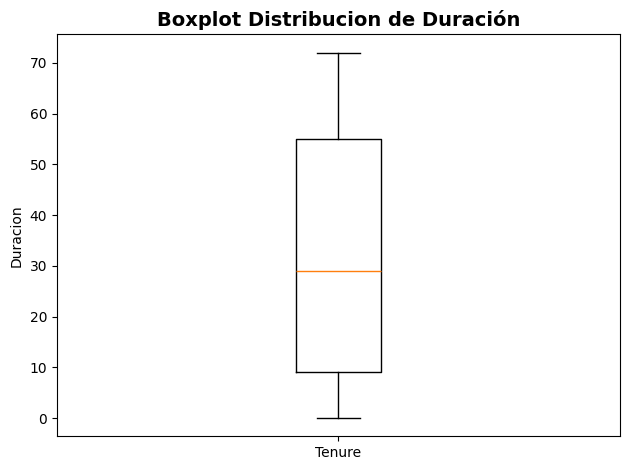

In [43]:
# Gráfico Bloxplot que muestra la distribución de columna Duración, concentracion de Totales
plt.boxplot(df["tenure"], labels=["Tenure"])
plt.title('Boxplot Distribucion de Duración', fontsize=14, fontweight="bold")
plt.ylabel('Duración')
plt.tight_layout()
plt.show()


* Se interpreta del gráfico que la mediana esta desplazada hacia a bajo y el bigote superior es más largo que el inferior, esto se interpreta que hay mas datos concentrados en la parte inferior y algunos valores en 'tenure' mas altos que se escapan de la mayoria de los datos.

### Crear dos tipos diferentes de visualizaciones exploratorias multivariadas

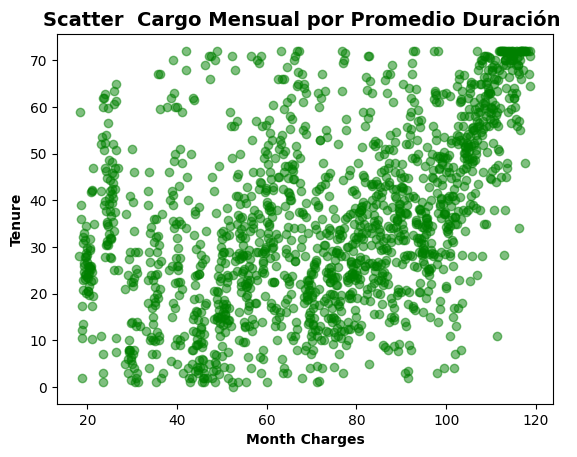

In [37]:
# Se creo un nuevo dataframe con el promedio de 'tenure' clasificado por 'monthlycharges' y se resetearon los indices
ds_df = df.groupby(["monthlycharges"])["tenure"].mean().reset_index()

# Grafico Scatter que muestra correlacion de Cargo Mensual y la Duración del Contrato
plt.scatter(ds_df["monthlycharges"], ds_df["tenure"], color='green', alpha=0.5 )

plt.title("Scatter  Cargo Mensual por Promedio Duración ", fontsize=14, fontweight='bold')
plt.xlabel("Month Charges", fontweight='bold')
plt.ylabel("Tenure", fontweight='bold')
plt.show()

*

* Se interpreta en el gráfico que hay una concentración de puntos en diagonal hacia la derecha, que indica un tendencia de clientes con Total de Cargos más altos que tienen mayor duracion en la empresa.

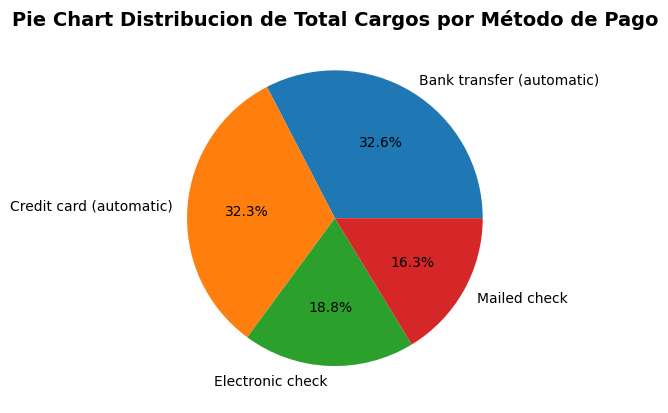

In [44]:
# Se creo un nuevo dataframe con el promedio de Cargo Total, clasificado por Métodos de Pago y se resetea los indices
pf_df = df.groupby(["paymentmethod"])["totalcharges"].mean().reset_index()

# Grafico Pie Chart que muestra correlacion de 'totalcharges' y 'paymentmethod'
plt.pie(pf_df["totalcharges"], labels=pf_df["paymentmethod"], autopct="%.1f%%")
plt.title("Pie Chart Distribucion Total Cargos por Método de Pago",fontsize=14, fontweight='bold')
plt.show()

* Se interpreta en el gráfico que hay una preferencia en el metodo de pago automatico por sobre los metodos manuales, teniendo las dos primeras preferencias con un 64.9 % del Total de Cargos. Sin embargo casi un tercio se realiza con métodos manuales, lo que representa una oportunidad para mejorar.  